# **Ames Housing**

### Ames Housing is model that helps predict house prices in Ames, IA, USA. We only need ceratin features of the houses to feed into the algorithm.

In [1]:
#import all the necessary library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data/Ames_Housing_Data.csv')

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.info()
#In total there are 2930 datapoints available to feed our model.
#There are 11 float and 27 integer features present.
#Remaining 43 features are present in object datatype which requires transformation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

<Axes: >

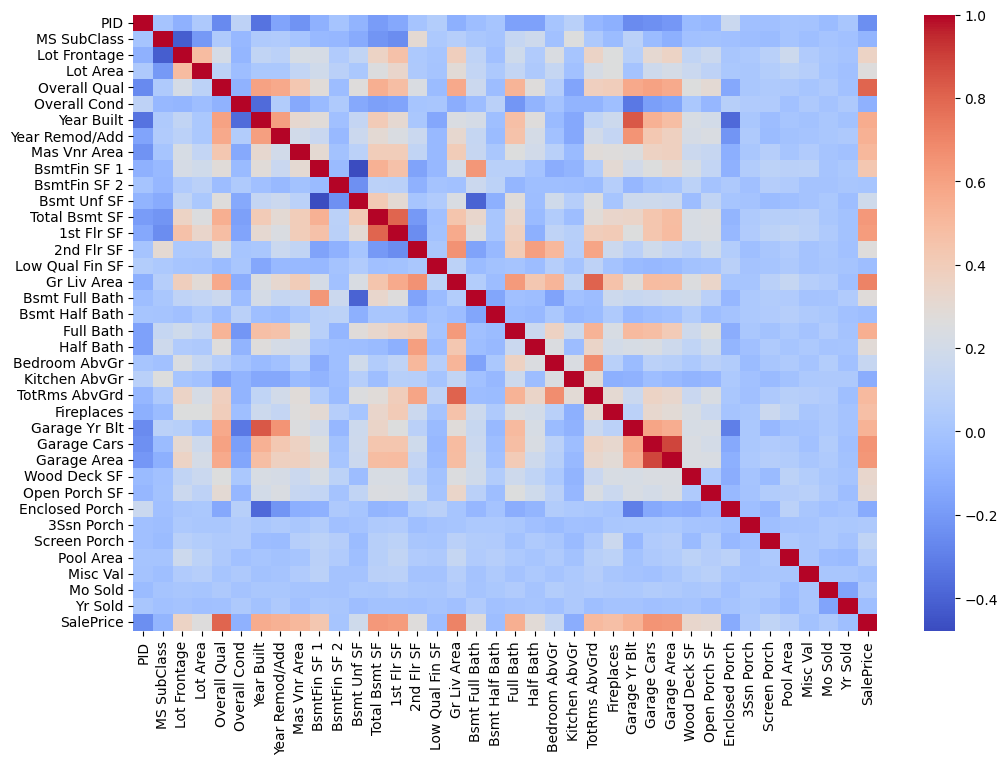

In [5]:
#Heatmap can represent the correlation between the features in the simplest form.
df_object = df.select_dtypes(exclude='object')
#Correlation can only be performed on continues data.
plt.figure(figsize=(12,8),dpi=100)
sns.heatmap(df_object.corr(),cmap='coolwarm')

In [6]:
# Here out Depending variable is 'SalePrice' so correlation with saleprice can give the gist of important features.
df_object.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

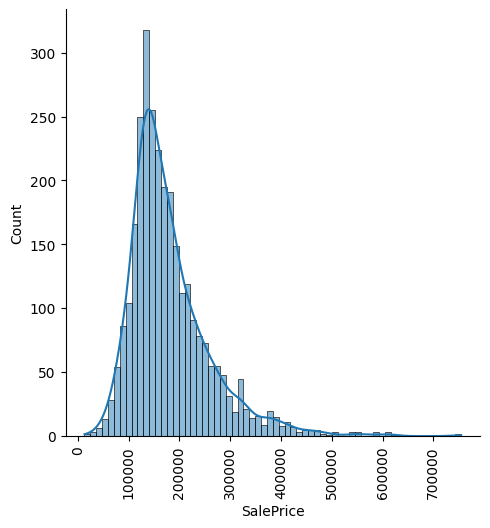

In [7]:
# Distplot can show at what price there is most concentration of prices, it even give the amount of outliers.
sns.displot(df['SalePrice'],kde=True)
plt.xticks(rotation=90);

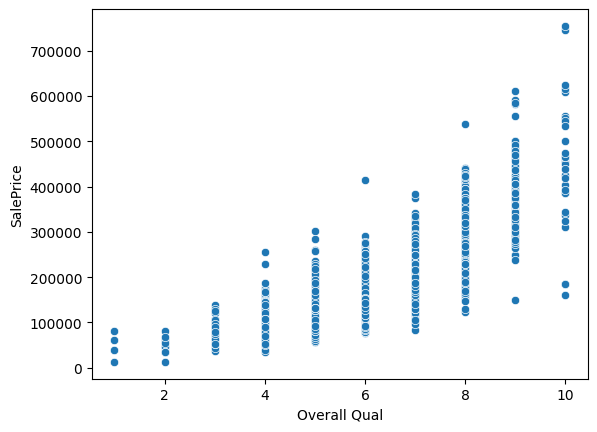

In [8]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);
# Here in this plot we can see few outliers where the Quality is very high but the price is very low.
# Let's look deep into these data points.

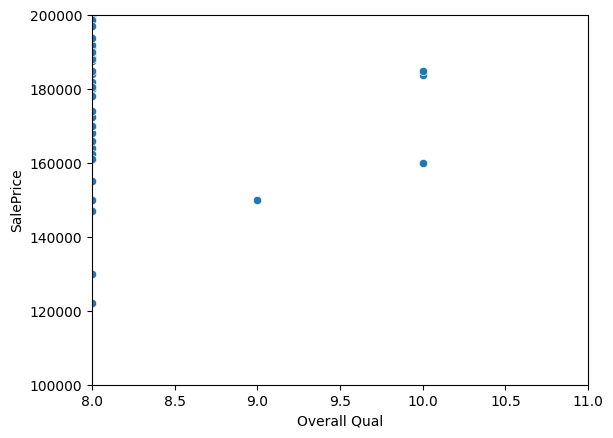

In [9]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)
plt.xlim(8,11)
plt.ylim(100000,200000);
# Here I modified my Xaxis and Yaxis to see points closely.

In [10]:
df[(df['Overall Qual']> 8) & (df['SalePrice']<200000)]
# Using the points location on the plot I derieved the rows to see all the features.

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


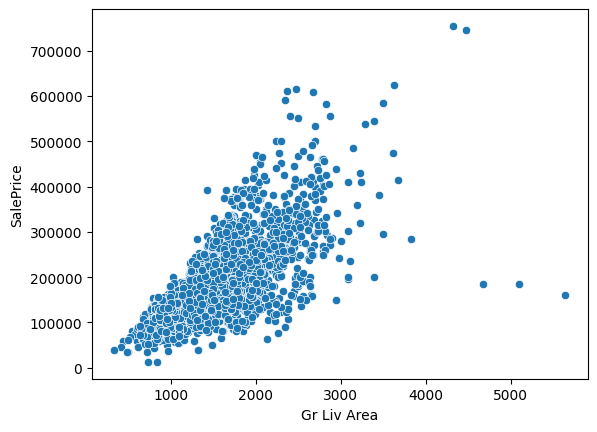

In [11]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);
# I tried to reconform these points as outliers by ploting Living Area against Sale prices
# Walla, this scatterplot also conforms these points as outliers.

In [12]:
df[(df['SalePrice']<300000) & (df['Gr Liv Area']> 4000)]
# As expected these are the same rows which we see above data frame.

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [13]:
# Grabing the index points of the outliers.
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

Index([1498, 2180, 2181], dtype='int64')

In [14]:
# Assigning these index to the variable ind_drop, so that we can call them when required.
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [15]:
# drop() function will drop based on the index position we call.
df = df.drop(ind_drop,axis=0)

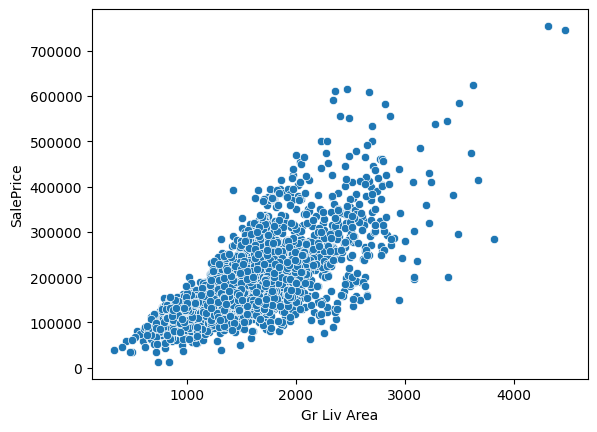

In [16]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);
# Cool, here the outliers are removed from the data set.

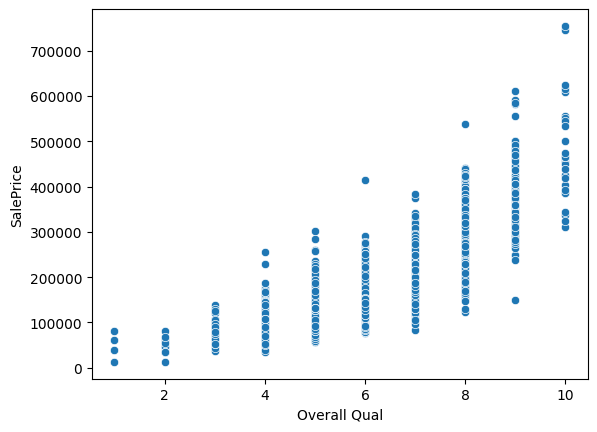

In [17]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);
# This conforms the removal of outliers.

In [18]:
# With "open" we can see the description of the dataset.
with open('/content/drive/MyDrive/Data/Ames_Housing_Feature_Description.txt','r') as f:
  print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [19]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [20]:
# PID is just he id, so it doesn't serve any purpose for the model.
df = df.drop('PID',axis=1)

In [21]:
len(df.columns)
# In total there are 80 usefull features.

80

In [22]:
df.isnull().sum()[df.isnull().sum()>1].sort_values()
# We can abserve there are few missing values.

Bsmt Full Bath       2
Bsmt Half Bath       2
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
BsmtFin Type 2      81
Bsmt Exposure       83
Garage Type        157
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Lot Frontage       490
Fireplace Qu      1422
Mas Vnr Type      1775
Fence             2355
Alley             2729
Misc Feature      2822
Pool QC           2915
dtype: int64

In [23]:
# Let's calculate the missing values in percentage.
percent_miss = (100 * df.isnull().sum() / len(df)).sort_values(ascending=False)

In [24]:
percent_miss = percent_miss[percent_miss != 0]

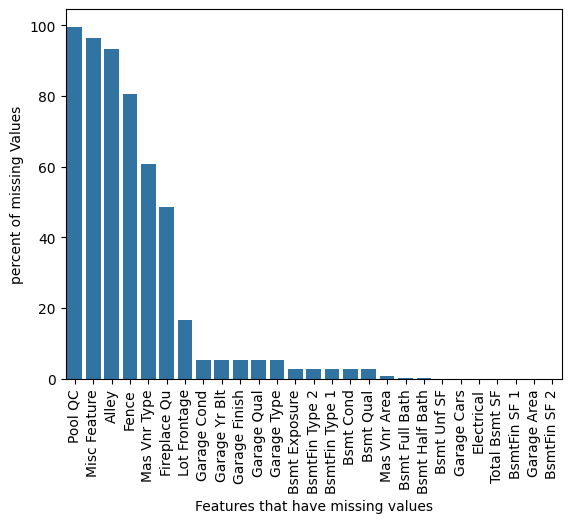

In [25]:
sns.barplot(percent_miss)
plt.ylabel('percent of missing Values')
plt.xlabel('Features that have missing values')
plt.xticks(rotation=90);
# Few of the features have above 99% of missing values.

In [26]:
# creating a function to calculating the missing values in percentage.
def percent_missing(df):
  percent_nan = 100 * df.isnull().sum() / len(df)
  percent_nan = percent_nan[percent_nan> 0].sort_values()
  return percent_nan

In [27]:
percent_nan = percent_missing(df)

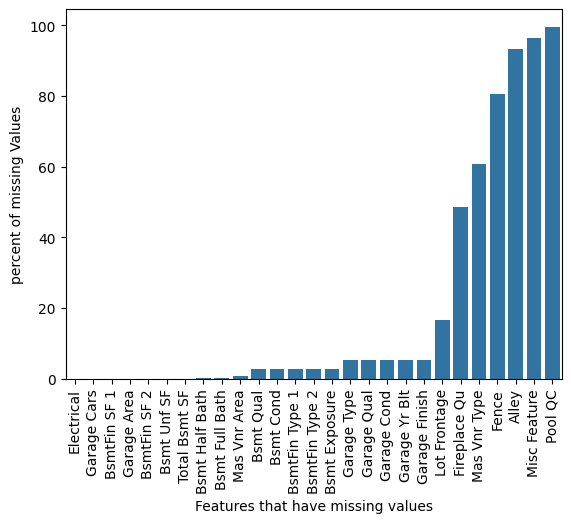

In [28]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylabel('percent of missing Values')
plt.xlabel('Features that have missing values');



*   Some of the features have high missing values, it doesn't make sense if we impute them. Few of them have very less missing values.
*   Let's see step by step what we can do with the features that contain missing values.



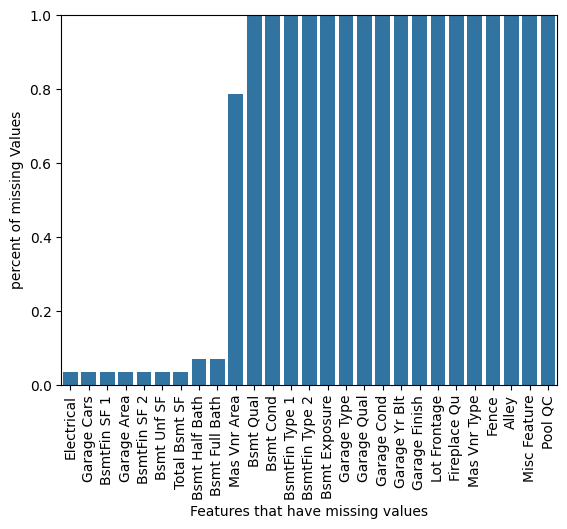

In [29]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylabel('percent of missing Values')
plt.xlabel('Features that have missing values')
plt.ylim(0,1);
# Magnified above image.

In [30]:
percent_nan[percent_nan < 1]
# These are the features that contain less than 1% percent of missing values.

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [31]:
# checking one data point that have missing values in 'Total Bsmt SF' feature.
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [32]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [33]:
# Dividing the numerical and String features so that we can impute the missing values.
bsmt_num_cols = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']
bsmt_str_cols = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']

In [34]:
# Fill Na is a function that helps to fill the missing values with specific number of object.
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')
# Here we imputed with NONE because there feature are related to Basement and these houses doesn't have any basement.

In [35]:
percent_nan = percent_missing(df)

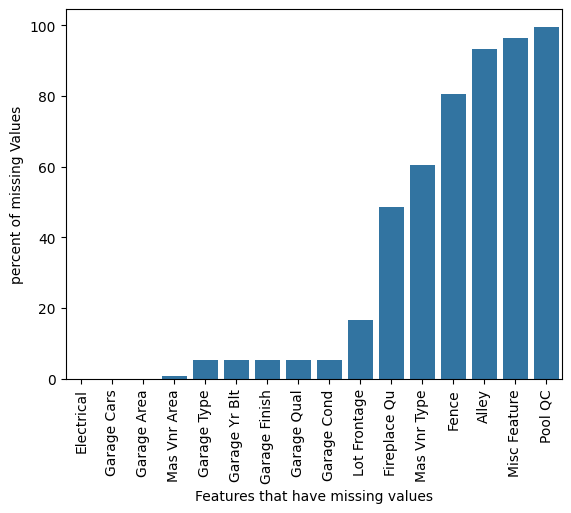

In [36]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.ylabel('percent of missing Values')
plt.xlabel('Features that have missing values')
plt.xticks(rotation=90);
# Here the bars are reduced because we imputed for some of the features.

In [37]:
df = df.dropna(subset =['Electrical','Garage Cars'],axis=0)
# These rows have many missing values, so it's best to drop these rows.

In [38]:
percent_nan = percent_missing(df)

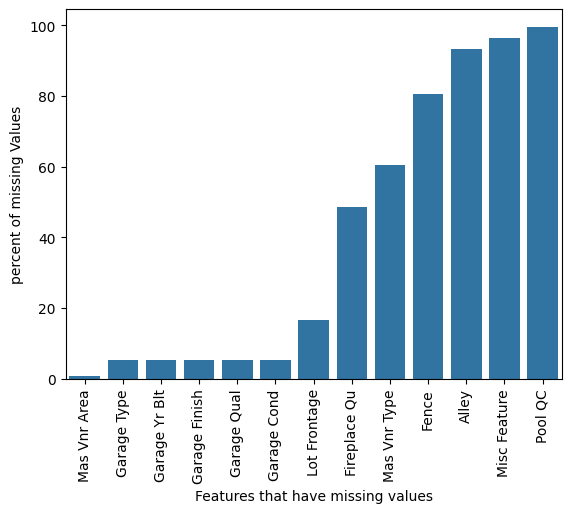

In [39]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.ylabel('percent of missing Values')
plt.xlabel('Features that have missing values')
plt.xticks(rotation=90);

In [40]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [41]:
percent_nan = percent_missing(df)

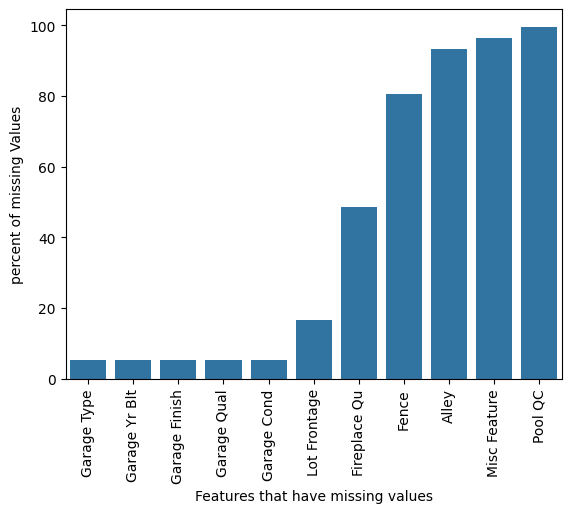

In [42]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.ylabel('percent of missing Values')
plt.xlabel('Features that have missing values')
plt.xticks(rotation=90);

In [43]:
df[['Garage Type','Garage Finish','Garage Qual','Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


In [44]:
gar_str_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')
# We are filling these data points as NONE because these houses doesn't have any Garage.

In [45]:
df['Garage Yr Blt'].fillna(0,inplace=True)
# There are no garage built year, if there is no garage

In [46]:
percent_nan = percent_missing(df)

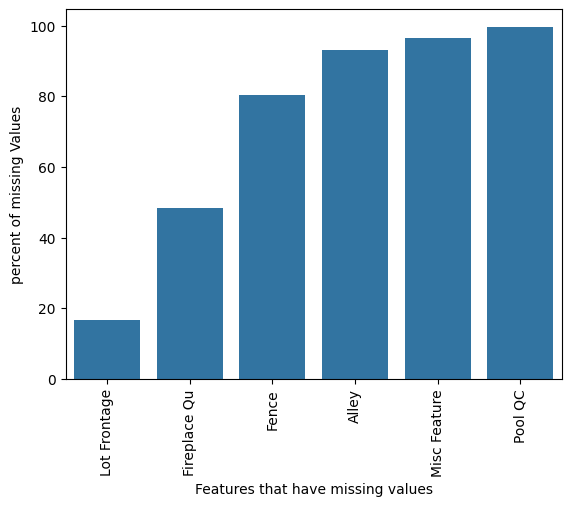

In [47]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.ylabel('percent of missing Values')
plt.xlabel('Features that have missing values')
plt.xticks(rotation=90);



*   So we are left with very few features and these features have high number of missing values.
*   Let's move to further steps.



In [48]:
percent_nan.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [49]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2925,37.0,NaN,GdPrv,NaN,NaN,NaN
2926,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,62.0,NaN,MnPrv,NaN,Shed,NaN
2928,77.0,TA,NaN,NaN,NaN,NaN


In [50]:
df = df.drop(['Fence', 'Alley', 'Misc Feature','Pool QC'],axis=1)
# 'Fence', 'Alley', 'Misc Feature','Pool QC' --> features have more than 80% of missing values. So better to drop these features all together.

In [51]:
percent_nan = percent_missing(df)

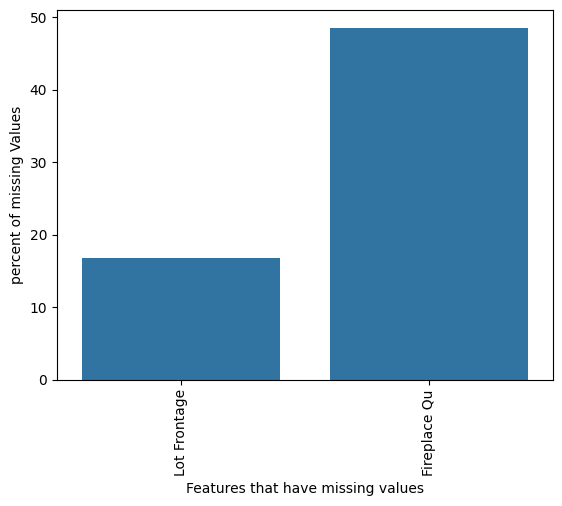

In [52]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.ylabel('percent of missing Values')
plt.xlabel('Features that have missing values')
plt.xticks(rotation=90);

In [53]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')
# Same as above there is no Fireplace, so filling with NONE

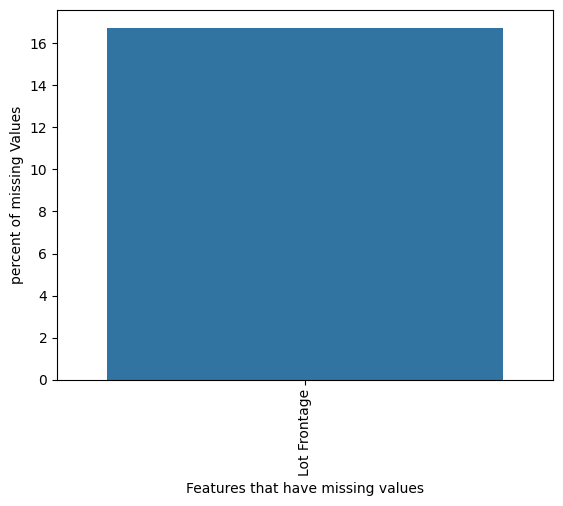

In [54]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.ylabel('percent of missing Values')
plt.xlabel('Features that have missing values')
plt.xticks(rotation=90);

In [91]:
# Here what I am trying to do is, I am using the most corelated feature with Lot Frontage to fill the missing values.
df['Neighborhood'].unique()

28

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

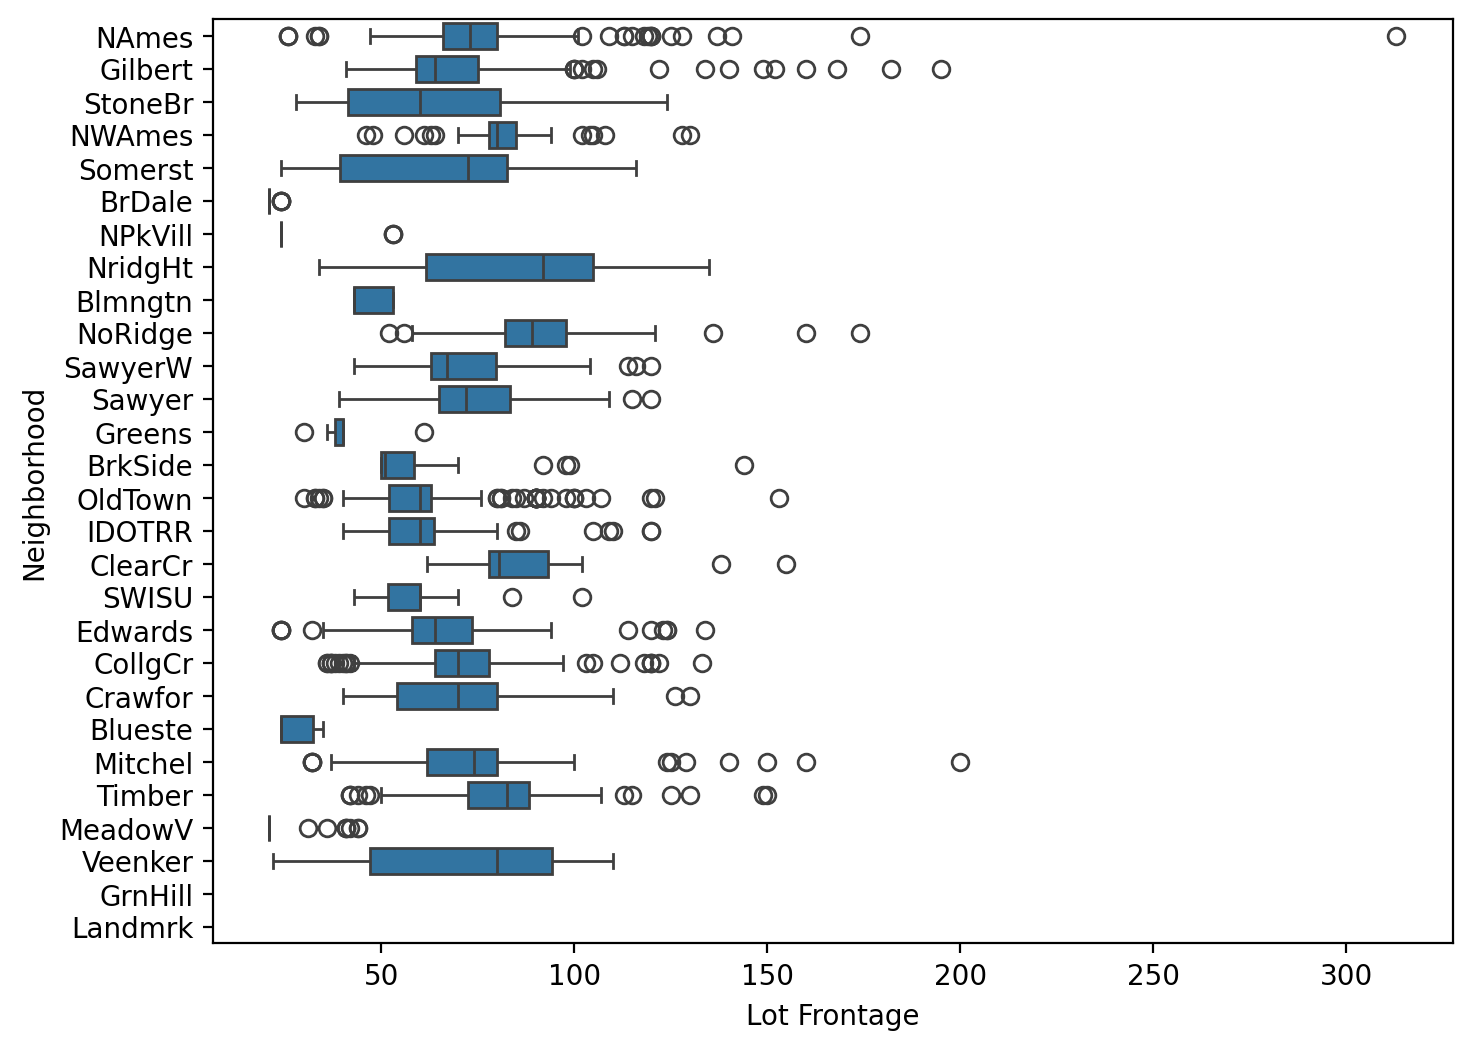

In [56]:
plt.figure(figsize=(8,6),dpi=200)
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [57]:
# I am grouping with Neighborhood and taking the mean value for Lot frontage in respect to every Neighborhood.
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [58]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [59]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2897,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2898,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2912,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [87]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))
# Creating a feature with Lot Frontage by using the Neighborhood and Lot Frontage.

In [61]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

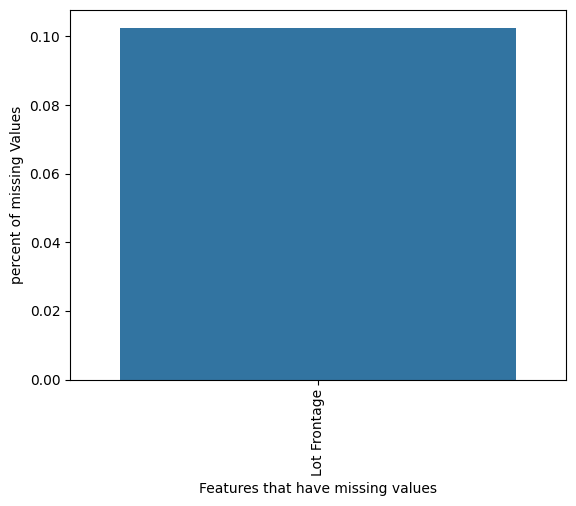

In [62]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.ylabel('percent of missing Values')
plt.xlabel('Features that have missing values')
plt.xticks(rotation=90);

In [63]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [64]:
df = pd.read_csv('/content/drive/MyDrive/Data/Ames_NO_Missing_Data.csv')

In [65]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [66]:
# df['MS SubClass'] = df['MS SubClass'].apply(str)

In [67]:
df.select_dtypes(include='object')

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,WD,Normal
2921,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2922,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,WD,Normal
2923,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [68]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [69]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   int64  
 1   Lot Frontage     2925 non-null   float64
 2   Lot Area         2925 non-null   int64  
 3   Overall Qual     2925 non-null   int64  
 4   Overall Cond     2925 non-null   int64  
 5   Year Built       2925 non-null   int64  
 6   Year Remod/Add   2925 non-null   int64  
 7   Mas Vnr Area     2925 non-null   float64
 8   BsmtFin SF 1     2925 non-null   float64
 9   BsmtFin SF 2     2925 non-null   float64
 10  Bsmt Unf SF      2925 non-null   float64
 11  Total Bsmt SF    2925 non-null   float64
 12  1st Flr SF       2925 non-null   int64  
 13  2nd Flr SF       2925 non-null   int64  
 14  Low Qual Fin SF  2925 non-null   int64  
 15  Gr Liv Area      2925 non-null   int64  
 16  Bsmt Full Bath   2925 non-null   float64
 17  Bsmt Half Bath

In [70]:
df_objs = pd.get_dummies(df_objs,drop_first=True)
final_df= pd.concat([df_nums,df_objs],axis=1)

In [71]:
# Here we get a DataFrame where there are no missing values.
final_df

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,True,False,False,False,True,False
2,20,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,20,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,60,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2921,20,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,...,False,False,False,False,True,False,False,False,True,False
2922,85,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2923,20,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,...,False,False,False,False,True,False,False,False,True,False


In [72]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 249 entries, MS SubClass to Sale Condition_Partial
dtypes: bool(212), float64(11), int64(26)
memory usage: 1.4 MB


In [73]:
# Dividing data into X(Indipendent data) and y(Dependent label)
X = final_df.drop('SalePrice', axis=1)
y = final_df['SalePrice']

In [74]:
# splitting the data keeping 10% of the data as test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [75]:
# We are Standardizing the data to make the scale in such a way that every feature is in Standard normal distribution.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
from sklearn.linear_model import ElasticNet
# Using ElasticNet Regression so that L1 and L2 regularization is used in proportion.
elasticnet = ElasticNet()

param_grid = {'alpha':[0.01,0.1,1,10,100],'l1_ratio':[0,.1,.3,.5,.7,.9,.95,.99,1]}
# we are looking for parameters in a range 'alpha'=[0.01,0.1,1,10,100] and 'l1_ratio'=[0,.1,.3,.5,.7,.9,.95,.99,1]
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(estimator=elasticnet,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

gridsearch.fit(X_train,y_train)



Fitting 5 folds for each of 45 candidates, totalling 225 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.123e+11, tolerance: 1.301e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.396e+11, tolerance: 1.386e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99,
                                      1]},
             scoring='neg_mean_squared_error', verbose=1)

In [77]:
gridsearch.best_estimator_
# Our grid search model choose alpha as 100 and l1_ratio as 1, so it is basical as L1 Regression.

ElasticNet(alpha=100, l1_ratio=1)

In [78]:
y_pred = gridsearch.predict(X_test)

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [80]:
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [81]:
mae
# This tells that our predictions are away by 16257$ from real price.

14549.102427248125

In [82]:
rmse

21159.99727123107

In [83]:
df["SalePrice"].std()

79951.69656395822

In [84]:
df["SalePrice"].mean()

180815.53743589742

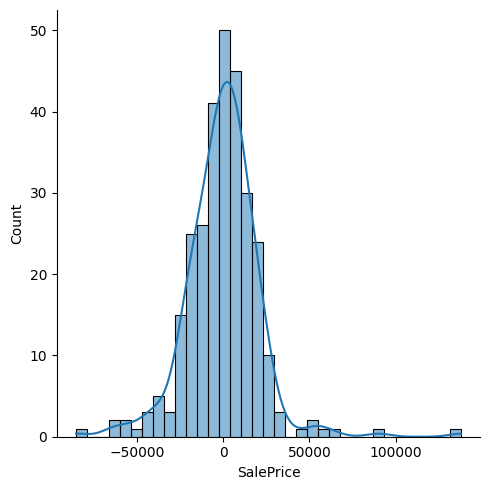

In [85]:
# This distplot will help to find the residuals.
sns.displot(y_test-y_pred,kde=True);

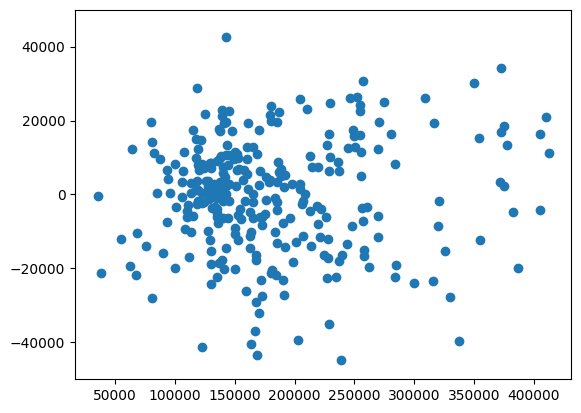

In [86]:
residules = y_test-y_pred

plt.scatter(x=y_test,y=residules)
plt.ylim([-50000,50000]);
# This scatterplot can show visually how much the residuals are scattered

# **Key Take aways**



*   The fundamental question here is whether the model has performed satisfactorily, and the answer depends on the set expectations..
*  The model's performance can be described by a range of approximately 14% above or below the predicted prices. If stakeholders find this level of deviation acceptable, the model is suitable for implementation; otherwise, adjustments can be made through hyperparameter tuning.
*   However, excessive hyperparameter tuning runs the risk of causing overfitting and generalization issues..
*   Overall, if stakeholders are comfortable with a 14% standard deviation and all necessary house features are available for Ames, USA house. Then price estimates can be provided.

